In [ ]:
import pandas as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [ ]:
data=ps.read_csv("/content/drive/MyDrive/project/thyroid.csv")

In [ ]:
data.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
0,65,F,f,f,f,f,f,f,f,t,...,12,f,?,t,99,t,1.14,t,87,N
1,44,M,f,f,f,f,f,f,f,f,...,45,t,1.4,t,39,t,1.16,t,33,N
2,65,M,f,f,f,f,f,f,f,f,...,14.8,t,1.5,t,61,t,0.85,t,72,N
3,27,F,f,f,f,f,f,f,f,f,...,15,t,1.6,t,82,t,0.82,t,100,N
4,54,F,f,f,f,f,f,f,f,f,...,19,t,2.2,t,83,t,1.03,t,81,N


In [ ]:
data.shape

(899, 27)

In [ ]:
data.describe()

,age
count,899.000000
mean,51.993326
std,19.278291
min,1.000000
25%,37.000000
50%,54.000000
75%,68.000000
max,90.000000


In [ ]:
data.dtypes

age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
binaryClass                  object
dtype: object

In [ ]:
list1=data['binaryClass'].tolist()


In [ ]:
p=list1.count('P')
print("Possitive",p)
n=list1.count('N')
print("Negative",n)


Possitive 499
Negative 400


In [ ]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'binaryClass'],
      dtype='object')

In [ ]:
for column in data.columns:
    print(column,(data[column].unique()))

age [65 44 27 54 34 39 62  1 50 26 42 59 79 33 63 19 55 70 74 67 80 75 29 68
 18 45 35 46  7 77 37 78 71 73 76 38 23 72 60 40 28 31 47 56 53 61 36 84
 64 16 25 69 83 48 32 86 57 41 30  2 52 49 51 82 88 24 15 58 43 85 81 21
 87 66 22 17 13 10 89 20 90]
sex ['F' 'M' '?']
on thyroxine ['f' 't']
query on thyroxine ['f' 't']
on antithyroid medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid surgery ['f' 't']
I131 treatment ['f' 't']
query hypothyroid ['t' 'f']
query hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH measured ['t' 'f']
TSH ['12' '45' '14.8' '15' '19' '7.8' '160' '8.8' '151' '9.4' '6.1' '11.4'
 '143' '16' '108' '9' '9.2' '86' '9.1' '52' '31' '51' '9.6' '24' '42' '10'
 '8.6' '6.2' '28' '9.7' '18' '55' '14' '6.7' '7.6' '8' '11' '44' '7.9'
 '7.2' '6.4' '25' '33' '7.1' '199' '188' '98' '22' '6.6' '35' '8.2' '60'
 '6.9' '29' '13' '7.5' '34' '103' '8.9' '9.3' '26' '54' '8.3' '478' '6.8'
 '8.1' '100' '58' 

In [ ]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count != 0:
        print(column,data[column][data[column]=='?'].count())

sex 30
TSH 62
T3 173
TT4 37
T4U 76
FTI 76


In [ ]:
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

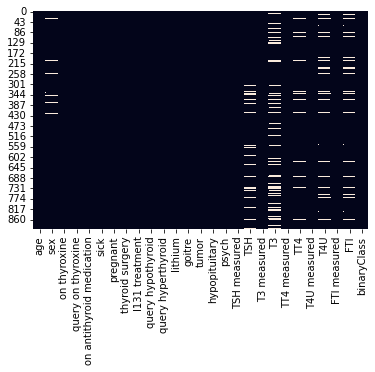

In [ ]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [ ]:
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)


In [ ]:
data.isnull().sum()

age                           0
sex                          30
on thyroxine                  0
query on thyroxine            0
on antithyroid medication     0
sick                          0
pregnant                      0
thyroid surgery               0
I131 treatment                0
query hypothyroid             0
query hyperthyroid            0
lithium                       0
goitre                        0
tumor                         0
hypopituitary                 0
psych                         0
TSH measured                  0
TSH                           0
T3 measured                   0
T3                            0
TT4 measured                  0
TT4                           0
T4U measured                  0
T4U                           0
FTI measured                  0
FTI                           0
binaryClass                   0
dtype: int64

In [ ]:
data["sex"] = data["sex"].replace({"F":1,"M":0})

In [ ]:
data["sex"] = data["sex"].fillna(data["sex"].median())

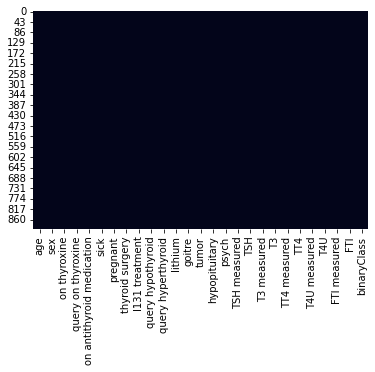

In [ ]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [ ]:
dss=data.replace({"t":1,"f":0})


In [ ]:
ds=dss.replace({"P":1,"N":0})

In [ ]:
age = ds[ds.binaryClass == 1]

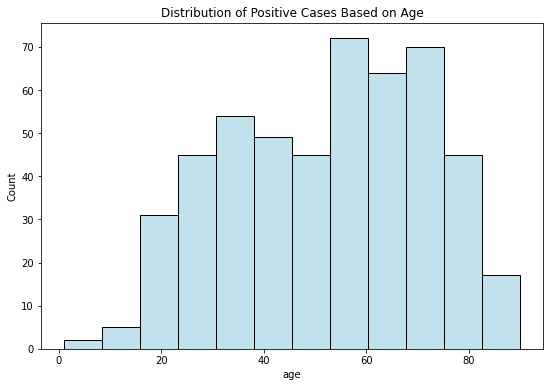

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(x="age",data=age,color="lightblue")
plt.title("Distribution of Positive Cases Based on Age")
plt.show()

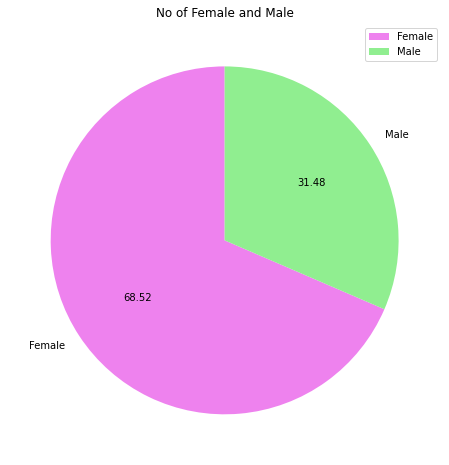

In [ ]:

plt.figure(figsize=(10,8))
plt.pie(x=data.sex.value_counts(),
        labels=["Female","Male"],
        startangle = 90,
        colors=["violet","lightgreen"],
        autopct='%.2f'
       );
plt.title("No of Female and Male")
plt.legend();

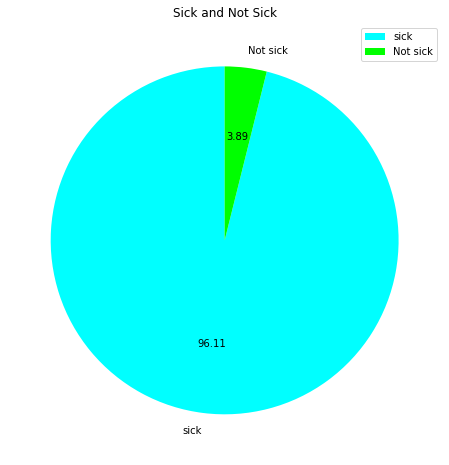

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(x=data.sick.value_counts(),
        labels=["sick","Not sick"],
        startangle = 90,
        colors=["aqua","lime"],
        autopct='%.2f'
       );
plt.title("Sick and Not Sick")
plt.legend();

In [ ]:
import numpy as np
import sklearn
x=ds.iloc[:,:-1]
y=ds.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=100)


In [ ]:
print(x_train)

     age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
863   31  1.0             0                   0                          0   
623   89  1.0             0                   0                          0   
325   21  1.0             0                   0                          0   
510   80  0.0             0                   0                          0   
315   26  1.0             0                   0                          0   
..   ...  ...           ...                 ...                        ...   
855   69  0.0             0                   0                          0   
871   26  1.0             0                   0                          0   
835   74  1.0             0                   0                          0   
792   68  1.0             0                   0                          0   
520   28  1.0             0                   0                          1   

     sick  pregnant  thyroid surgery  I131 treatment  query hyp

In [ ]:
print(x_test)

     age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
433   41  1.0             1                   0                          0   
788   49  0.0             0                   0                          0   
686   56  1.0             0                   0                          0   
24    75  1.0             0                   0                          0   
481   34  1.0             1                   0                          1   
..   ...  ...           ...                 ...                        ...   
225   54  0.0             0                   0                          0   
255   33  1.0             0                   0                          0   
666   17  1.0             0                   0                          0   
301   81  0.0             0                   0                          0   
790   76  0.0             0                   0                          0   

     sick  pregnant  thyroid surgery  I131 treatment  query hyp

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
classi=RandomForestClassifier(n_estimators=20, max_features=3)
classi.fit(x_train,y_train)
y_pre = classi.predict(x_test)
print("RANDOM FOREST CLASSIFIER")
print("Accuracy",metrics.accuracy_score(y_test,y_pre)*100)
from sklearn.metrics import confusion_matrix

RANDOM FOREST CLASSIFIER
Accuracy 80.88888888888889


In [ ]:
cm=confusion_matrix(y_test,y_pre)
cm

array([[86, 25],
       [18, 96]])

In [ ]:
tp=cm[0][0]
tn=cm[1][1]
fp=cm[0][1]
fn=cm[1][0]
print("True Possitive=",tp)
print("True Negative=",tn)
print("False Possitive=",fp)
print("False Negative=",fn)

True Possitive= 86
True Negative= 96
False Possitive= 25
False Negative= 18


In [ ]:
pre=tp/(tp+fp)
re=tp/(tp+fn)
fm=2*pre*re/(pre+re)
print("Precision=",pre)
print("Recall=",re)
print("F Measure=",fm)

Precision= 0.7747747747747747
Recall= 0.8269230769230769
F Measure= 0.8


In [ ]:
from sklearn.decomposition import PCA


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(ds)
transformed = pca.transform(ds)
x_pca = transformed
print(x_pca.shape)
print(x_pca)


(899, 27)
[[ 3.71654656e+00 -7.37868182e+00 -8.62513601e+00 ... -1.97495345e-03
   2.76512003e-03  5.10373271e-16]
 [ 8.60606102e+01 -3.52722446e+01  1.19453131e+01 ... -6.31501904e-05
  -1.78054907e-02 -7.45365089e-17]
 [ 3.36448728e+01 -3.12702632e+01 -1.16430910e+01 ...  9.73332159e-05
  -3.59084706e-03 -1.27415900e-16]
 ...
 [-6.04248047e+01  3.75306586e+01  1.70295082e+01 ...  1.06931262e-03
  -3.61574839e-03  2.60756750e-16]
 [-1.70086141e+01 -2.92249406e+00  2.08568145e+00 ... -6.63290511e-05
  -4.18216353e-03 -1.02077815e-16]
 [ 2.44630356e+01 -3.75035180e+01  1.14363148e+01 ... -4.69493747e-03
   1.20527743e-02  3.48208171e-16]]


In [ ]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, random_state=100)

In [ ]:
print(x_train_pca)

[[-7.14357717e+00 -1.07579442e+01  2.01794251e+01 ... -4.01310049e-03
   3.99706035e-03  7.07852519e-16]
 [-8.34031152e+00 -1.25956915e+01 -3.44106489e+01 ...  9.00625818e-03
   1.32237904e-02  1.36025867e-16]
 [-7.13050441e+01  5.12259893e+01  2.76013859e+01 ... -1.82821311e-05
   1.98361688e-02  4.13734673e-16]
 ...
 [-2.70356169e+01  4.48528825e+00 -2.17720539e+01 ...  7.37440226e-04
   9.27307009e-03 -8.25004888e-17]
 [-2.44224699e+01  3.41198104e+00 -1.22480104e+01 ...  1.08805850e-03
   1.21566011e-03 -8.53684501e-17]
 [-2.26865839e+01  7.62022125e+00  2.84128882e+01 ... -1.88895063e-02
   1.15365289e-02 -3.08063343e-16]]


In [ ]:
print(x_test_pca)

[[-2.18020120e+01  9.54904790e+00  1.03004733e+01 ... -2.14800272e-03
  -1.11913534e-03  2.41409851e-16]
 [-1.09247714e+01 -8.99507099e+00 -2.42799501e+00 ... -1.97861128e-03
  -5.65371227e-03 -8.84974484e-17]
 [-1.93722061e+01 -5.07910759e-01  4.40686051e-01 ... -3.01117845e-03
   1.12360289e-02  1.36025867e-16]
 ...
 [-4.66001222e+01  2.89301133e+01  4.01491196e+01 ... -1.08676306e-02
  -7.71295651e-03 -1.55996745e-16]
 [-1.46901621e+01 -6.48537271e+00 -2.73238930e+01 ...  5.63251187e-03
  -3.72066854e-03 -7.65399133e-17]
 [ 6.28208859e+00 -2.41313449e+01 -2.16752685e+01 ...  2.65235603e-03
  -3.58122783e-03 -1.18854174e-16]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
model =RandomForestClassifier(n_estimators=20, max_features=3)
model.fit(x_train_pca, y_train)
y_pre= model.predict(x_test_pca)
print("RANDOM FOREST WITH PCA")
print("Accuracy",metrics.accuracy_score(y_test,y_pre)*100)
from sklearn.metrics import confusion_matrix


RANDOM FOREST WITH PCA
Accuracy 95.55555555555556


In [ ]:
cm=confusion_matrix(y_test,y_pre)
cm

array([[105,   6],
       [  4, 110]])

In [ ]:
tp=cm[0][0]
tn=cm[1][1]
fp=cm[0][1]
fn=cm[1][0]
print("True Possitive=",tp)
print("True Negative=",tn)
print("False Possitive=",fp)
print("False Negative=",fn)

True Possitive= 105
True Negative= 110
False Possitive= 6
False Negative= 4


In [ ]:
pre=tp/(tp+fp)
re=tp/(tp+fn)
fm=2*pre*re/(pre+re)
print("Precision=",pre)
print("Recall=",re)
print("F Measure=",fm)

Precision= 0.9459459459459459
Recall= 0.963302752293578
F Measure= 0.9545454545454546
